In [1]:
# Group all `import`s here at a later date.

# Data Cleaning & Checking

## Importing, checking and cleaning the (non-image) data

First, import the csv file for non-image features and take a look at it.

In [2]:
import pandas as pd

In [3]:
raw_data_path = "../raw_data/Data_Entry_2017.csv"
bb_data_path = "../raw_data/BBox_List_2017.csv"
data = pd.read_csv(raw_data_path)
data_bb = pd.read_csv(bb_data_path)

In [4]:
data_bb.head()

,Image Index,Finding Label,Bbox [x,y,w,h],Unnamed: 6,Unnamed: 7,Unnamed: 8
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441,NaN,NaN,NaN
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525,NaN,NaN,NaN
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153,NaN,NaN,NaN
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034,NaN,NaN,NaN
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695,NaN,NaN,NaN


In [5]:
data_bb.drop(data_bb.columns[-3:], axis=1, inplace=True)
data_bb.columns = ["img_idx", "label", "bb_x", "bb_y", "bb_w", "bb_h"]

In [6]:
data_bb.head()

,img_idx,label,bb_x,bb_y,bb_w,bb_h
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695


In [7]:
data_bb.img_idx.nunique()

880

In [8]:
data_bb.shape

(984, 6)

**Note:** We will forget about the BB data for the time being and move on to the main CSV.

In [9]:
data.shape

(112120, 12)

In [10]:
data.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


Drop the columns we don't need and set shorter column names.

In [11]:
data.drop(data.columns[-1], axis=1, inplace=True)
data.drop(columns=["Follow-up #", "Patient ID"], inplace=True)
data.columns = ["img_idx", "labels", "age", "gender", "view_pos", "img_w", "img_h", "img_pix_spc_x", "img_pix_spc_y"]

In [12]:
data.shape

(112120, 9)

In [13]:
data.head()

,img_idx,labels,age,gender,view_pos,img_w,img_h,img_pix_spc_x,img_pix_spc_y
0,00000001_000.png,Cardiomegaly,58,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,81,M,PA,2500,2048,0.171,0.171
4,00000003_000.png,Hernia,81,F,PA,2582,2991,0.143,0.143


Take a look at data statistics, cardinality, types, etc.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   img_idx        112120 non-null  object 
 1   labels         112120 non-null  object 
 2   age            112120 non-null  int64  
 3   gender         112120 non-null  object 
 4   view_pos       112120 non-null  object 
 5   img_w          112120 non-null  int64  
 6   img_h          112120 non-null  int64  
 7   img_pix_spc_x  112120 non-null  float64
 8   img_pix_spc_y  112120 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 7.7+ MB


In [15]:
data.isnull().values.any()

False

It appears that we do not have any `null`s, which is good.  
**_To do:_** Consider downcasting data types to save memory.  
For example:  
```python
data["age"] = pd.to_numeric(data["age"], downcast=’uint8’) # 0-255
```
Binary columns can be `bool` and image specs can be smaller variants of `int`.

In [16]:
data.nunique()

img_idx          112120
labels              836
age                 107
gender                2
view_pos              2
img_w               904
img_h              1137
img_pix_spc_x        23
img_pix_spc_y        23
dtype: int64

In [17]:
data.describe()

,age,img_w,img_h,img_pix_spc_x,img_pix_spc_y
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000
mean,46.901463,2646.078844,2486.438842,0.155649,0.155649
std,16.839923,341.246429,401.268227,0.016174,0.016174
min,1.000000,1143.000000,966.000000,0.115000,0.115000
25%,35.000000,2500.000000,2048.000000,0.143000,0.143000
50%,49.000000,2518.000000,2544.000000,0.143000,0.143000
75%,59.000000,2992.000000,2991.000000,0.168000,0.168000
max,414.000000,3827.000000,4715.000000,0.198800,0.198800


Maximum age of `414` does not make sense. There appears to be an issue with the `age` column.

In [18]:
# import matplotlib.pyplot as plt
import seaborn as sns

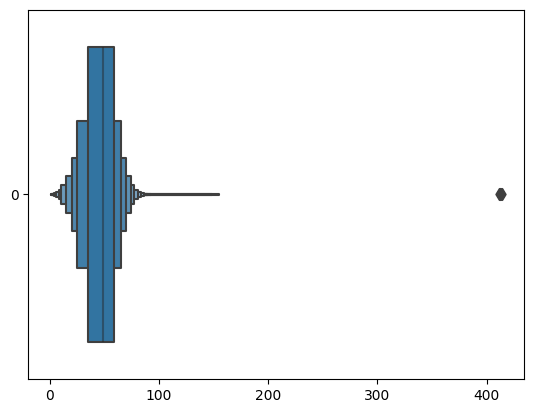

In [19]:
sns.boxenplot(data.age, orient="horizontal");

In [20]:
data = data[data.age < 125] # The oldest person to ever live was ~122 years old when they passed.

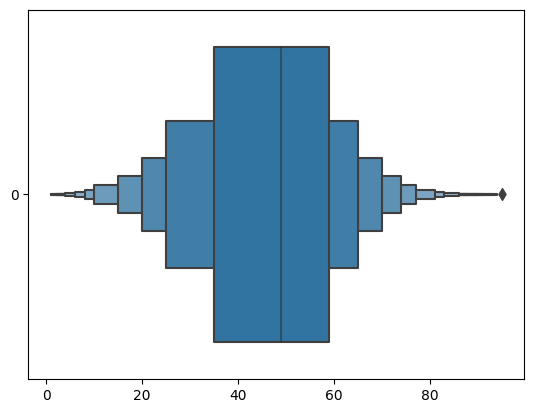

In [21]:
sns.boxenplot(data.age, orient="horizontal");

In [22]:
data.shape

(112104, 9)

Check for duplicates.

In [23]:
data.drop_duplicates(inplace=True)

In [24]:
data.shape

(112104, 9)

In [25]:
data.tail()

,img_idx,labels,age,gender,view_pos,img_w,img_h,img_pix_spc_x,img_pix_spc_y
112115,00030801_001.png,Mass|Pneumonia,39,M,PA,2048,2500,0.168,0.168
112116,00030802_000.png,No Finding,29,M,PA,2048,2500,0.168,0.168
112117,00030803_000.png,No Finding,42,F,PA,2048,2500,0.168,0.168
112118,00030804_000.png,No Finding,30,F,PA,2048,2500,0.168,0.168
112119,00030805_000.png,No Finding,27,M,PA,2048,2500,0.171,0.171


Visualize the data.

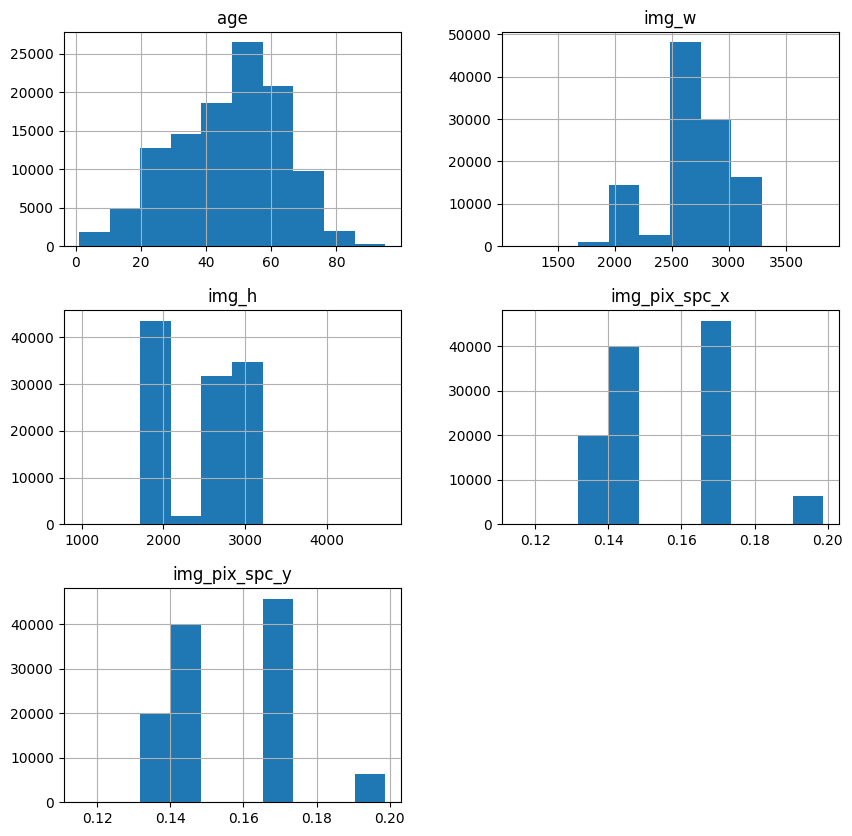

In [26]:
data.hist(figsize=(10,10));

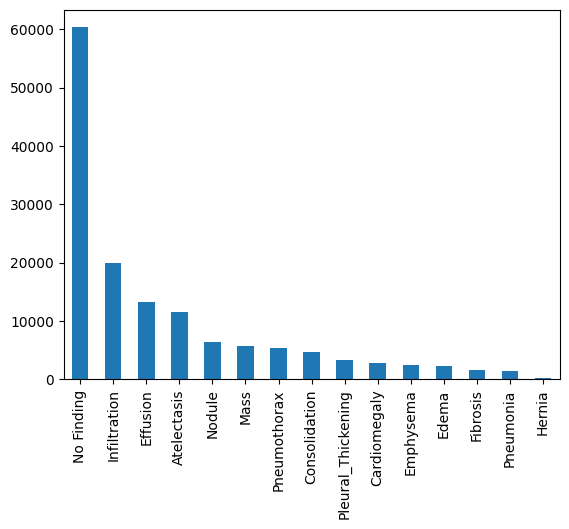

In [27]:
# Split labels based on a delimiter 
data["labels"].str.split("|").explode("labels").value_counts().plot(kind="bar");

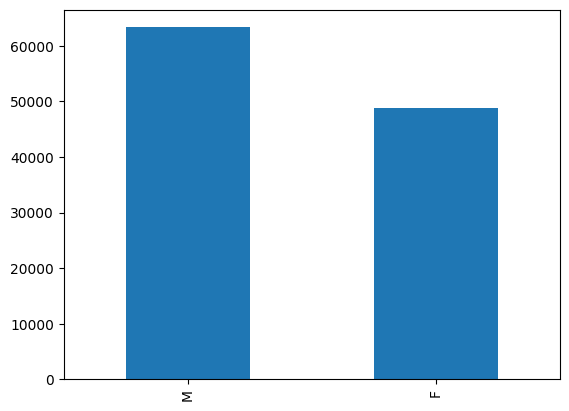

In [28]:
data["gender"].value_counts().plot(kind="bar");

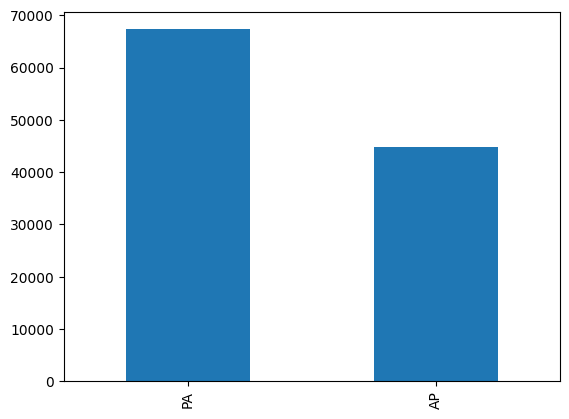

In [29]:
data["view_pos"].value_counts().plot(kind="bar");

Next, convert and expand the `labels` column to corresponding individual columns with boolean values for each condition that we care about, plus an aggregate "other" column for all the other ones. We will keep the original `labels` column because the EDA notebook uses it. But we should remove it (or pass it through the pipeline without using it) during training.
Effectively, we are multi-label binary-encoding the labels (manually for now; in the future, we could use a [`MultiLabelBinarizer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html) in our pipeline).

In [30]:
all_labels = list(
    pd.DataFrame(data["labels"].str.split("|").explode("labels")).labels.unique()
)

do_care_labels = [
    "Pneumonia",
    "Cardiomegaly",
    "Pleural_Thickening",
    "Consolidation",
    "Pneumothorax",
    "Effusion",
    "No Finding",
]
other_labels = [l for l in all_labels if l not in do_care_labels]

In [31]:
for l in all_labels:
    data[l] = data.labels.apply(lambda x: l in x)

In [32]:
data["Other"] = False
for l in other_labels:
    data["Other"] = data["Other"] | data[l]

In [33]:
data.drop(columns=other_labels, inplace=True)
for l in do_care_labels + ["Other"]:
    data.rename(columns={l: "label_"+l.lower().replace(" ", "_")}, inplace=True)

In [34]:
data

,img_idx,labels,age,gender,view_pos,img_w,img_h,img_pix_spc_x,img_pix_spc_y,label_cardiomegaly,label_effusion,label_no_finding,label_pneumothorax,label_pleural_thickening,label_pneumonia,label_consolidation,label_other
0,00000001_000.png,Cardiomegaly,58,M,PA,2682,2749,0.143,0.143,True,False,False,False,False,False,False,False
1,00000001_001.png,Cardiomegaly|Emphysema,58,M,PA,2894,2729,0.143,0.143,True,False,False,False,False,False,False,True
2,00000001_002.png,Cardiomegaly|Effusion,58,M,PA,2500,2048,0.168,0.168,True,True,False,False,False,False,False,False
3,00000002_000.png,No Finding,81,M,PA,2500,2048,0.171,0.171,False,False,True,False,False,False,False,False
4,00000003_000.png,Hernia,81,F,PA,2582,2991,0.143,0.143,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,39,M,PA,2048,2500,0.168,0.168,False,False,False,False,False,True,False,True
112116,00030802_000.png,No Finding,29,M,PA,2048,2500,0.168,0.168,False,False,True,False,False,False,False,False
112117,00030803_000.png,No Finding,42,F,PA,2048,2500,0.168,0.168,False,False,True,False,False,False,False,False
112118,00030804_000.png,No Finding,30,F,PA,2048,2500,0.168,0.168,False,False,True,False,False,False,False,False


Actually, we don't care about the colums related to the dimensions and "pixel spacing" of the  original images so we will now remove them.

In [35]:
data.drop(columns=["view_pos", "img_w", "img_h", "img_pix_spc_x", "img_pix_spc_y"], inplace=True)
data.head()

,img_idx,labels,age,gender,label_cardiomegaly,label_effusion,label_no_finding,label_pneumothorax,label_pleural_thickening,label_pneumonia,label_consolidation,label_other
0,00000001_000.png,Cardiomegaly,58,M,True,False,False,False,False,False,False,False
1,00000001_001.png,Cardiomegaly|Emphysema,58,M,True,False,False,False,False,False,False,True
2,00000001_002.png,Cardiomegaly|Effusion,58,M,True,True,False,False,False,False,False,False
3,00000002_000.png,No Finding,81,M,False,False,True,False,False,False,False,False
4,00000003_000.png,Hernia,81,F,False,False,False,False,False,False,False,True


Save the cleaned data to disk.

In [36]:
clean_data_path = "../clean_data/cleaned_data.csv"
data.to_csv(clean_data_path, index=False)